In [29]:
import random as rd
import matplotlib.pyplot as plt

In [30]:
### create Student Class
class Student:

  def __init__(self, id, shyness, attitude, cap, usageRate, year):
    self.id = id

    ##characteristics (integers)
    #low score means more shy (normal distribution, mean 0 and s.d 1)
    self.shyness = shyness
    '''
    attitude towards drinking 
    (normal distribution, mean is MeanAttitude and s.d 1)
    determines usagerate, whether student may drink alone and addiction 
    '''
    self.attitude = attitude
    '''
    updated at the end of the school year
    if below a threshold, student can't continue next year (inSchool = 0)
    '''
    self.cap = cap
    #number of times drinking (in the past 30 days?)>should update every 30 or just keep it for the whole sem?
    self.usageRate = usageRate

    self.inSchool = True    
    self.year = year

    ##social life (lists)
    self.friends = []
    #list of days they are hosting a party in the next week, and a list of attendees
    self.host = []
    self.guestList = []
    #list of days student will attend someone else's party
    self.whenAttend = []


  def host_party(self, student_list):   
    #determine if hosting that week,
    attending = self.whenAttend     
    p_host = (0.2 * self.shyness**2) - (len(attending))/5
    num = rd.random()
    if num <= p_host:

      #choose which day to host
      week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
      for a in attending:
        if a in week:
          week.remove(a)
      #
      day = rd.choices(week, weights = [0.05,0.05,0.05,0.05,0.1,0.35,0.35])
      self.host.append(day)   

      #send out invites
      
      for others in student_list:
        #is there a better way to select the respective students based on their id?
        #two nested for loops - might get hard over large student populations
        if others.id in self.friends:
          others.willAttend(day) 
          if day in others.whenAttend:
            self.guestList.append(others.id)
  
  #when student gets invited to a party
  def willAttend(self, day):
    if day not in self.whenAttend:
      num = rd.random()
      weekend = ['Sun','Sat']
      if day in weekend:
        if num <= 0.8:
          self.whenAttend.append(day)
      else:
        if num <= 0.4:
          self.whenAttend.append(day)
       
  def partyDrink(self, peer_pressure):
    # arbitrary coefficients 
    # limits - self.attitude = [2, 3]
    #        - attitudeUse = [1,1]
    #        - peer_pressure = [0, 1]
    #        - usageRate = []
    #        - usageRateUse = []
    # take note of the limits
    p_drink = (self.attitude/ attitudeUse) + (2*peer_pressure) - 0.1*(self.usageRate/usageRateUse)
    num = rd.random()
    if num <= p_drink:
      self.usageRate += 1
      self.experience()
      return 1
    return 0
     
      

  def drinkAlone(self):
    if self.attitude > 3:
      p_alone = self.attitude/15
      num = rd.random()
      if num <= p_alone:
        self.usageRate += 1

  #after a drink at the party  
  def experience(self):
    num = rd.noramlvariate(meanExperience, stDevExperience)
    if num < -6:
      num = -6
    elif num > 3:
      num = 3

    #if party gets busted
    bust = rd.random()
    if bust < probabilityofBust:
      num -= 3

    #update attitude towards drinking
    # attitude update is arbitrary at 0.1
    self.attitude += num*0.1
#    self.attitude += num*0.5

    
  #every 3 weeks
  def gradeExperience(self):
    if self.usageRate > usageRateGradeDrop:
      poor_exp = -1*(self.usageRate/15)
      self.attitude += (poor_exp * 0.2)

  #at the end of the semester
  def gradeUpdate(self):
    std_dev = 0.2/self.year
    change = rd.normalvariate(0.1,std_dev)

    #add on to grade drop due to drinking
    if self.usageRate > usageRateGradeDrop:
      mean_drop = self.usageRate/(30*self.year)
      s_dev = 0.5/self.year
      grade_drop = rd.normalvariate(mean_drop,s_dev)
      change += grade_drop
    
    student.cap -= change    

In [31]:
### students interacting

def make_friends(student1, student2):
  if student2.id not in student1.friends:
    shy1, shy2 = student1.shyness, student2.shyness
    fr1,fr2 = len(student1.friends), len(student2.friends)
    att1, att2 = student1.attitude, student2.attitude
    p = ((wShy*(shy1 + shy2 + 4)) - (wFr*((fr1/(3+shy1)) + (fr2/(3+shy2)))) - (wAtt*(att1 - att2))) / (8*wShy)
    num = rd.random()
    if num <= p:
      student1.friends.append(student2.id) 
      student2.friends.append(student1.id)

#for all students at the party
def party_friends(attendees):
  
  for guest in attendees:
    for others in attendees: 
      if guest != others:
        make_friends(guest, others)
  #will it be running the function twice for some of them? How to avoid?

#when there's a party host
def party_time(host, student_list, day):
  invited = host.guestList
  attendees = [host]
  peer_pressure = 0
  for others in student_list:
    if others.id in invited:
      attendees.append(others)

  party_friends(attendees)

  #3 rounds of drinking or not
  for j in range(3):
    for member in attendees:
      x = member.partyDrink(peer_pressure)
      peer_pressure += (x/len(attendees))

  host.guestList.remove(day)

In [32]:
## Input variables

MeanAttitude = 3
NumberOfAgents = 1000
wShy = 0.8 
wFr = 0.8 
wAtt = 0.5 
usageRateUse = 6 
attitudeUse = 1 
meanExperience = 1.6 
stdDevExperience = 1.6 
probabilityOfBust = 0.001
maxGoodExperience = 3 
usageRateGradeDrop = 13

In [33]:
##making lists for the variables

attitude_list = []
shyness_list = []
cap_list = []
usagerate_list = []
year_list = []


for student in range(NumberOfAgents):
  shyness_ = rd.normalvariate(0,1)
  attitude_ = rd.normalvariate(MeanAttitude,0.5)
  cap_ = rd.normalvariate(3.5, 0.5)
  if cap_ < 2:
    cap_ = 2
  elif cap_ > 5:
    cap_ = 5

  if attitude_ < 0:
    usagerate_ = 0
  elif attitude_ <= 5:
    usagerate_ = round(attitude_)
  else:
    usagerate_ = round(2*attitude_)

  year_ = rd.choice([1,2,3,4])
  
  shyness_list.append(shyness_)
  attitude_list.append(attitude_)
  cap_list.append(cap_)
  year_list.append(year_)
  usagerate_list.append(usagerate_)

  #id, shyness, attitude, cap, usageRate, year

In [34]:
## making a dataframe that represents student attributes

import pandas as pd

id_list = rd.sample(range(1, 100000), NumberOfAgents)

df = pd.DataFrame({"id": id_list,
                   "shyness": shyness_list,
                   "attitude": attitude_list,
                   "cap": cap_list,
                   "usage": usagerate_list,
                   "year": year_list,
                   })
df.head()

,id,shyness,attitude,cap,usage,year
0,572,-0.778846,3.513249,3.881987,4,3
1,54296,0.248051,3.481146,3.607912,3,2
2,87132,0.001783,2.723944,3.781666,3,2
3,19227,0.113947,2.065603,3.161658,2,1
4,48554,0.320259,3.258282,3.361811,3,3


In [35]:
### making a list of student objects

student_list = []

for index, row in df.iterrows():
  #print(index)
  #print(row)
  student = Student(row['id'], 
                    row['shyness'],
                    row['attitude'],
                    row['cap'],
                    row['usage'],
                    row['year'])
  student_list.append(student)

3.5012803106668042


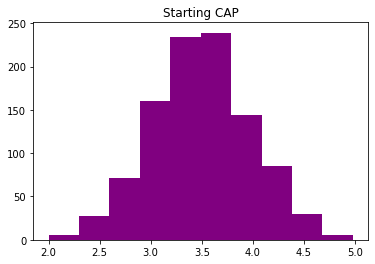

In [36]:
start_cap = []
total_start_cap = 0
for student in student_list:
  start_cap.append(student.cap)
  total_start_cap += student.cap

avg_start_cap = total_start_cap/len(student_list)
print(avg_start_cap)

plt.hist(start_cap, color = 'purple')
plt.title('Starting CAP')
plt.show()

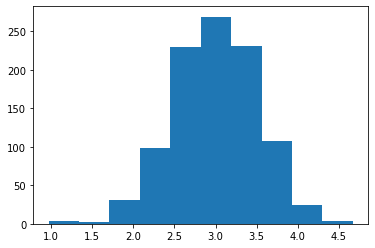

In [37]:
now_attitude = []
for student in student_list:
  now_attitude.append(student.attitude)

plt.hist(now_attitude)
plt.show()

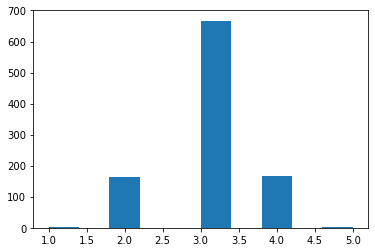

In [38]:
start_usage = []
for student in student_list:
  start_usage.append(student.usageRate)

plt.hist(start_usage)
plt.show()

In [39]:
### The simulation
usage_list = {}
attitude_list = {}

for week in range(13):
  for student in student_list:
    student.host_party(student_list)
  if week == 0:
    #make some friends
    for student in student_list:            
      if student.year == 1:             
        for i in range(20):
          if student != student_list[i]:
            make_friends(student, student_list[i])
      else:             
        for j in range(30):
          if student != student_list[j]:
            make_friends(student, student_list[j])

  elif week %3 == 0 and week != 12:
    #grade experience
    for student in student_list:
      student.gradeExperience()

  elif week == 12:
    #grade update
    for student in student_list:
      student.gradeUpdate()
      if student.cap < 2:
        student.inSchool = False
        student_list.remove(student)

  days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
  for day in days:
    for student in student_list:
      if day in student.host:
        #party starts
        party_time(student, student_list, day)
                  
    #if there's no one hosting
    else:
      for loners in student_list:
        loners.drinkAlone()

  total_use = 0
  for student in student_list:
    total_use += student.usageRate
  avg_use = total_use/len(student_list)  
  usage_list[week] = avg_use        

  total_att = 0
  for student in student_list:
    total_att += student.attitude
  avg_att = total_att/len(student_list)
  attitude_list[week] = avg_att

In [40]:
attitude_list

{0: 3.0018406304056215,
 1: 3.0018406304056215,
 2: 3.0018406304056215,
 3: 3.000680630405621,
 4: 3.000680630405621,
 5: 3.000680630405621,
 6: 2.960240630405616,
 7: 2.960240630405616,
 8: 2.960240630405616,
 9: 2.853747297072283,
 10: 2.853747297072283,
 11: 2.853747297072283,
 12: 2.845721489409558}

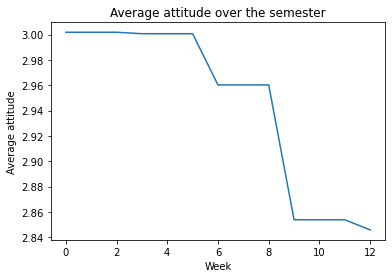

In [41]:
weeks = []
att = []

for key, value in attitude_list.items():
  weeks.append(key)
  att.append(value)

plt.plot(weeks, att)
plt.title('Average attitude over the semester')
plt.xlabel('Week')
plt.ylabel('Average attitude')
plt.show()

3.2743164200307207
4.978141914132344
5.1486126173526365


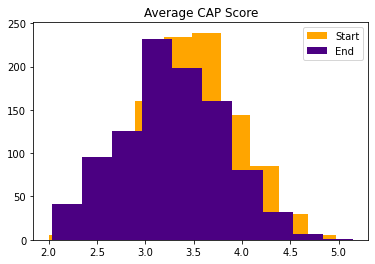

In [42]:
end_cap = []
total_cap = 0
for student in student_list:
  end_cap.append(student.cap)
  total_cap += student.cap

avg_cap = total_cap/len(student_list)
print(avg_cap)
print(max(start_cap))
print(max(end_cap))

plt.hist(start_cap, color = 'orange')
plt.hist(end_cap, color = 'indigo')
plt.legend(['Start', 'End'])
plt.title('Average CAP Score')
plt.show()

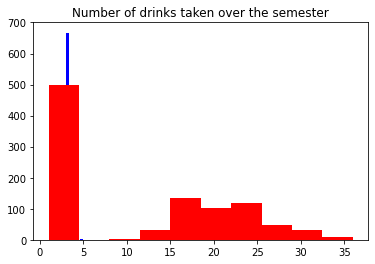

In [43]:
end_usage = []
for student in student_list:
  end_usage.append(student.usageRate)

plt.hist(start_usage, color = 'blue')
plt.hist(end_usage, color = 'red')
plt.title('Number of drinks taken over the semester')
plt.show()

(array([ 30.,  64.,  81., 113.,  88.,  60.,  27.,  10.,   2.,   1.]),
 array([2.03452771, 2.3459362 , 2.65734469, 2.96875318, 3.28016167,
        3.59157016, 3.90297865, 4.21438714, 4.52579563, 4.83720413,
        5.14861262]),
 <a list of 10 Patch objects>)

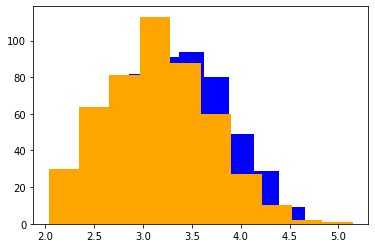

In [44]:
end_test = pd.DataFrame({'usage': end_usage, 'cap':end_cap})

g1 = end_test[end_test['usage'] < 8]
g2 = end_test[end_test['usage'] > 8]
plt.hist(g1['cap'], color = 'blue')
plt.hist(g2['cap'], color = 'orange')

In [45]:
##making lists for the variables - second run

attitude_list = []
shyness_list = []
cap_list = []
usagerate_list = []
year_list = []


for student in range(NumberOfAgents):
  shyness_ = rd.normalvariate(0,1)
  attitude_ = rd.normalvariate(MeanAttitude,0.5)
  cap_ = rd.normalvariate(3.5, 0.5)
  if cap_ < 2:
    cap_ = 2
  elif cap_ > 5:
    cap_ = 5

  if attitude_ < 0:
    usagerate_ = 0
  elif attitude_ <= 5:
    usagerate_ = round(attitude_)
  else:
    usagerate_ = round(2*attitude_)

  year_ = rd.choice([1,2,3,4])
  
  shyness_list.append(shyness_)
  attitude_list.append(attitude_)
  cap_list.append(cap_)
  year_list.append(year_)
  usagerate_list.append(usagerate_)

  #id, shyness, attitude, cap, usageRate, year


id_list = rd.sample(range(1, 100000), NumberOfAgents)

df = pd.DataFrame({"id": id_list,
                   "shyness": shyness_list,
                   "attitude": attitude_list,
                   "cap": cap_list,
                   "usage": usagerate_list,
                   "year": year_list,
                   })

### making a list of student objects

student_list = []

for index, row in df.iterrows():
  #print(index)
  #print(row)
  student = Student(row['id'], 
                    row['shyness'],
                    row['attitude'],
                    row['cap'],
                    row['usage'],
                    row['year'])
  student_list.append(student)

In [46]:
### The simulation - 2nd run
usage_list_2 = {}
attitude_list_2 = {}

for week in range(13):
  for student in student_list:
    student.host_party(student_list)
  if week == 0:
    #make some friends
    for student in student_list:            
      if student.year == 1:             
        for i in range(20):
          if student != student_list[i]:
            make_friends(student, student_list[i])
      else:             
        for j in range(30):
          if student != student_list[j]:
            make_friends(student, student_list[j])

  elif week %3 == 0 and week != 12:
    #grade experience
    for student in student_list:
      student.gradeExperience()

  elif week == 12:
    #grade update
    for student in student_list:
      student.gradeUpdate()
      if student.cap < 2:
        student.inSchool = False
        student_list.remove(student)

  days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
  for day in days:
    for student in student_list:
      if day in student.host:
        #party starts
        party_time(student, student_list, day)
                  
    #if there's no one hosting
    else:
      for loners in student_list:
        loners.drinkAlone()

  total_use = 0
  for student in student_list:
    total_use += student.usageRate
  avg_use = total_use/len(student_list)  
  usage_list_2[week] = avg_use        

  total_att = 0
  for student in student_list:
    total_att += student.attitude
  avg_att = total_att/len(student_list)
  attitude_list_2[week] = avg_att

In [47]:
##making lists for the variables - third run

attitude_list = []
shyness_list = []
cap_list = []
usagerate_list = []
year_list = []


for student in range(NumberOfAgents):
  shyness_ = rd.normalvariate(0,1)
  attitude_ = rd.normalvariate(MeanAttitude,0.5)
  cap_ = rd.normalvariate(3.5, 0.5)
  if cap_ < 2:
    cap_ = 2
  elif cap_ > 5:
    cap_ = 5

  if attitude_ < 0:
    usagerate_ = 0
  elif attitude_ <= 5:
    usagerate_ = round(attitude_)
  else:
    usagerate_ = round(2*attitude_)

  year_ = rd.choice([1,2,3,4])
  
  shyness_list.append(shyness_)
  attitude_list.append(attitude_)
  cap_list.append(cap_)
  year_list.append(year_)
  usagerate_list.append(usagerate_)

  #id, shyness, attitude, cap, usageRate, year


id_list = rd.sample(range(1, 100000), NumberOfAgents)

df = pd.DataFrame({"id": id_list,
                   "shyness": shyness_list,
                   "attitude": attitude_list,
                   "cap": cap_list,
                   "usage": usagerate_list,
                   "year": year_list,
                   })

### making a list of student objects

student_list = []

for index, row in df.iterrows():
  #print(index)
  #print(row)
  student = Student(row['id'], 
                    row['shyness'],
                    row['attitude'],
                    row['cap'],
                    row['usage'],
                    row['year'])
  student_list.append(student)

In [48]:
### The simulation - run 3
usage_list_3 = {}
attitude_list_3 = {}

for week in range(13):
  for student in student_list:
    student.host_party(student_list)
  if week == 0:
    #make some friends
    for student in student_list:            
      if student.year == 1:             
        for i in range(20):
          if student != student_list[i]:
            make_friends(student, student_list[i])
      else:             
        for j in range(30):
          if student != student_list[j]:
            make_friends(student, student_list[j])

  elif week %3 == 0 and week != 12:
    #grade experience
    for student in student_list:
      student.gradeExperience()

  elif week == 12:
    #grade update
    for student in student_list:
      student.gradeUpdate()
      if student.cap < 2:
        student.inSchool = False
        student_list.remove(student)

  days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
  for day in days:
    for student in student_list:
      if day in student.host:
        #party starts
        party_time(student, student_list, day)
                  
    #if there's no one hosting
    else:
      for loners in student_list:
        loners.drinkAlone()

  total_use = 0
  for student in student_list:
    total_use += student.usageRate
  avg_use = total_use/len(student_list)  
  usage_list_3[week] = avg_use        

  total_att = 0
  for student in student_list:
    total_att += student.attitude
  avg_att = total_att/len(student_list)
  attitude_list_3[week] = avg_att

In [49]:
##making lists for the variables - fourth run

attitude_list = []
shyness_list = []
cap_list = []
usagerate_list = []
year_list = []


for student in range(NumberOfAgents):
  shyness_ = rd.normalvariate(0,1)
  attitude_ = rd.normalvariate(MeanAttitude,0.5)
  cap_ = rd.normalvariate(3.5, 0.5)
  if cap_ < 2:
    cap_ = 2
  elif cap_ > 5:
    cap_ = 5

  if attitude_ < 0:
    usagerate_ = 0
  elif attitude_ <= 5:
    usagerate_ = round(attitude_)
  else:
    usagerate_ = round(2*attitude_)

  year_ = rd.choice([1,2,3,4])
  
  shyness_list.append(shyness_)
  attitude_list.append(attitude_)
  cap_list.append(cap_)
  year_list.append(year_)
  usagerate_list.append(usagerate_)

  #id, shyness, attitude, cap, usageRate, year


id_list = rd.sample(range(1, 100000), NumberOfAgents)

df = pd.DataFrame({"id": id_list,
                   "shyness": shyness_list,
                   "attitude": attitude_list,
                   "cap": cap_list,
                   "usage": usagerate_list,
                   "year": year_list,
                   })

### making a list of student objects

student_list = []

for index, row in df.iterrows():
  #print(index)
  #print(row)
  student = Student(row['id'], 
                    row['shyness'],
                    row['attitude'],
                    row['cap'],
                    row['usage'],
                    row['year'])
  student_list.append(student)

In [50]:
### The simulation - run 4
usage_list_4 = {}
attitude_list_4 = {}

for week in range(13):
  for student in student_list:
    student.host_party(student_list)
  if week == 0:
    #make some friends
    for student in student_list:            
      if student.year == 1:             
        for i in range(20):
          if student != student_list[i]:
            make_friends(student, student_list[i])
      else:             
        for j in range(30):
          if student != student_list[j]:
            make_friends(student, student_list[j])

  elif week %3 == 0 and week != 12:
    #grade experience
    for student in student_list:
      student.gradeExperience()

  elif week == 12:
    #grade update
    for student in student_list:
      student.gradeUpdate()
      if student.cap < 2:
        student.inSchool = False
        student_list.remove(student)

  days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
  for day in days:
    for student in student_list:
      if day in student.host:
        #party starts
        party_time(student, student_list, day)
                  
    #if there's no one hosting
    else:
      for loners in student_list:
        loners.drinkAlone()

  total_use = 0
  for student in student_list:
    total_use += student.usageRate
  avg_use = total_use/len(student_list)  
  usage_list_4[week] = avg_use        

  total_att = 0
  for student in student_list:
    total_att += student.attitude
  avg_att = total_att/len(student_list)
  attitude_list_4[week] = avg_att

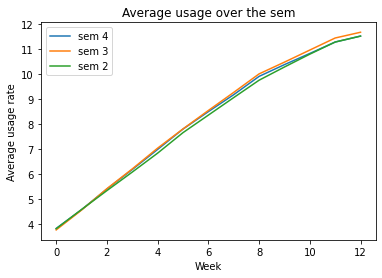

In [51]:
week2 = []
usage2 = []

for key, value in usage_list_2.items():
  week2.append(key)
  usage2.append(value)

week3 = []
usage3 = []

for key, value in usage_list_3.items():
  week3.append(key)
  usage3.append(value)

week4 = []
usage4 = []

for key, value in usage_list_4.items():
  week4.append(key)
  usage4.append(value)

plt.plot(week4, usage4, label = 'sem 4')
plt.plot(week3, usage3, label = 'sem 3')
plt.plot(week2, usage2, label = 'sem 2')
#plt.plot(weeks, usages, label = 'sem 1')
plt.title('Average usage over the sem')
plt.xlabel('Week')
plt.ylabel('Average usage rate')
plt.legend()
#plt.show()

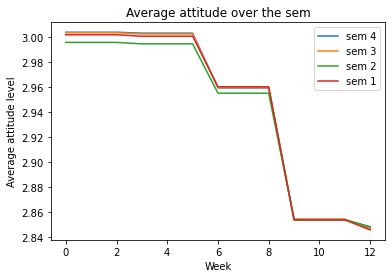

In [52]:
week2 = []
att2 = []

for key, value in attitude_list_2.items():
  week2.append(key)
  att2.append(value)

week3 = []
att3 = []

for key, value in attitude_list_3.items():
  week3.append(key)
  att3.append(value)

week4 = []
att4 = []

for key, value in attitude_list_4.items():
  week4.append(key)
  att4.append(value)

plt.plot(week4, att4, label = 'sem 4')
plt.plot(week3, att3, label = 'sem 3')
plt.plot(week2, att2, label = 'sem 2')
plt.plot(weeks, att, label = 'sem 1')
plt.title('Average attitude over the sem')
plt.xlabel('Week')
plt.ylabel('Average attitude level')
plt.legend()
plt.show()

In [53]:
friendship_len = []
shyness_score = []

for student in student_list:
  friendship_len.append(len(student.friends))
  shyness_score.append(student.shyness)

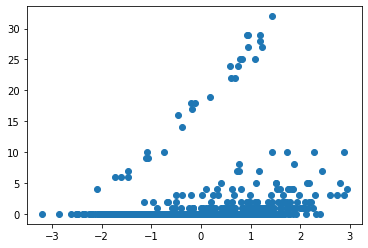

In [54]:
plt.scatter(shyness_score, friendship_len)